In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import ast

data_dir = "../../output/"

In [2]:
lf_dir = "../../output/features.txt"

with open(lf_dir, "r") as f:
    features = f.read().splitlines()

features = sorted(features)

with open(lf_dir, 'w') as f:
    for item in features:
        f.write("%s\n" % item)

# Load Data

In [16]:
train_df = pd.read_csv(os.path.join(data_dir, 'train_linguistic.csv'))

train_df = train_df.drop(columns=['paragraph', 'sentence'])
train_df = train_df.drop_duplicates()

train_df

,essay_id,full_text,score,mean_num_verbs_in_paragraph,mean_num_pronouns_in_paragraph,num_words_in_essay,mean_num_verbs_in_sentence,max_num_pronouns_in_paragraph,max_num_proper_nouns_in_sentence,25th_percentile_num_sentences_in_paragraph,...,min_num_proper_nouns_in_sentence,num_misspelled_words_in_essay,mean_num_misspelled_words_in_sentence,max_num_adverbs_in_paragraph,num_nouns_in_essay,min_num_pronouns_in_paragraph,25th_percentile_num_verbs_in_paragraph,75th_percentile_num_adverbs_in_sentence,75th_percentile_num_adjectives_in_paragraph,min_num_adjectives_in_paragraph
0,000d118,many people have car where they live. the thin...,3,65.000000,53.000000,546,5.000000,53,5,13.00,...,0,546,42.000000,15,107,53,65.0,1.0,38.00,38
13,000fe60,i am a scientist at nasa that is discussing th...,3,9.761905,12.000000,373,2.095238,15,2,3.00,...,0,373,17.761905,9,54,6,10.0,1.0,6.00,0
34,001ab80,people always wish they had the same technolog...,4,19.880000,13.760000,607,2.800000,22,0,4.00,...,0,607,24.280000,19,114,5,15.0,2.0,14.00,9
59,001bdc0,"we all heard about venus, the planet without a...",4,13.956522,7.521739,510,2.478261,10,2,4.00,...,0,510,22.173913,7,118,1,10.5,1.0,13.50,2
82,002ba53,"dear, state senator this is a letter to argue ...",3,7.875000,4.875000,419,2.187500,7,2,2.75,...,0,419,26.187500,3,90,0,3.0,1.0,12.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342289,ffd378d,"the story "" the challenge of exploing venus "" ...",2,6.000000,3.111111,168,1.888889,6,1,3.00,...,0,168,18.666667,5,41,1,5.0,2.0,3.00,2
342298,ffddf1f,technology has changed a lot of ways that we l...,4,15.555556,9.148148,644,3.296296,17,2,4.00,...,0,644,23.851852,6,134,4,9.0,2.0,17.00,7
342325,fff016d,if you don't like sitting around all day than ...,2,13.000000,13.333333,235,2.600000,18,0,5.00,...,0,235,15.666667,5,34,11,10.0,1.5,8.00,5
342340,fffb49b,"in ""the challenge of exporing venus,"" the auth...",1,20.000000,12.000000,270,1.818182,12,3,11.00,...,0,270,24.545455,16,58,12,20.0,3.0,25.00,25


In [4]:
print('Number of samples in train set:', len(train_df))

# Check for missing values
print('Number of missing values in train set:', train_df.isnull().sum().sum())

Number of samples in train set: 342364
Number of missing values in train set: 0


In [5]:
sample = train_df.sample(1)

print("Score of the sample:", sample['score'].values[0], '\n')

print("Full text of the sample:")

print(sample['full_text'].values[0])

Score of the sample: 3 

Full text of the sample:
f.a.c.s would be a valuable reasourse to read the emotions of students in a classroom, but over all useless and waste of resources. the abillity to read the emotions of a student and change the style of teaching is interesting, but if somthing is changed other students may find it boreing. every student has different emotions and you cannot change the lesson to fit that one student is is bored, because another student may become bored with the change. the variation of emotion in students is uncontrolled and how someone feels can change in seconds. f.a.c.s is interesting, but not needed in school and classrooms. many students don't care about school and will ingnore the change in the lesson like dr. huang is talking about. the article also never states how the class would be monitored. its also never stated how long the scan will take, the scan of emotion could take up class time if the scan needed to be infront of a computer. its also a

# Scores Analysis

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24840\2646840363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="score", data=temp, palette="viridis")


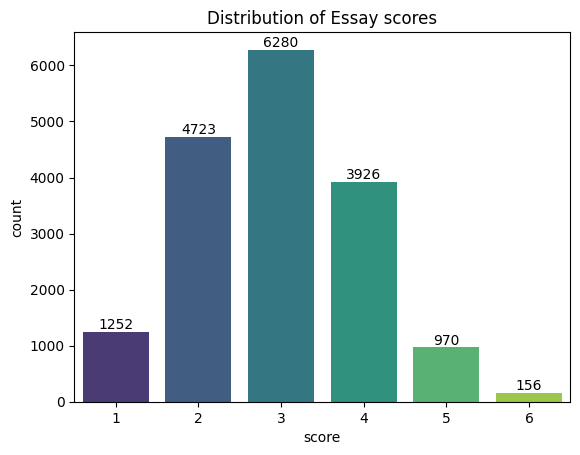

In [13]:
# plot distribution of scores
ax = sns.countplot(x="score", data=train_df, palette="viridis")

# add count on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title("Distribution of Essay scores")
plt.show()

In [14]:
train_df["score"].describe()

count    17307.000000
mean         2.948402
std          1.044899
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: score, dtype: float64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24840\3154968060.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="score", data=train_df, palette="viridis")


Text(0.5, 1.0, 'Boxplot of Essay scores')

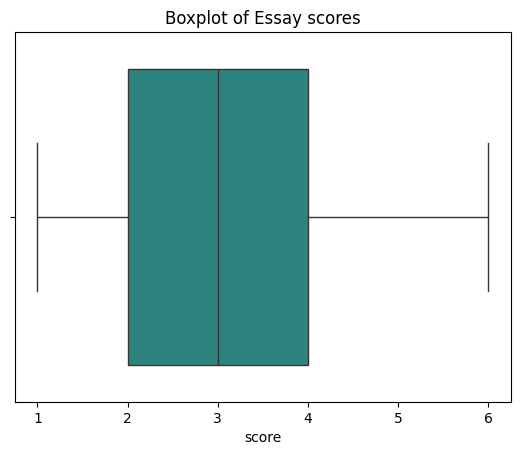

In [17]:
boxplot = sns.boxplot(x="score", data=train_df, palette="viridis")

plt.title("Boxplot of Essay scores")

# Word-scale analysis

Show figures function

In [9]:
def show_box_plot(df, x, y, title=None, palette="viridis", save=False, **kwargs):
    sns.boxplot(data=df, x=x, y=y, palette=palette, **kwargs)

    if save:
        plt.savefig(f"{title}.png")

    plt.title(title)
    plt.show()

In [10]:
def show_hist_plot(df, x, title, save=False, **kwargs):
    sns.histplot(data=df, x=x, kde=True, **kwargs)

    if save:
        plt.savefig(f"{title}.png")

    plt.title(title)
    plt.show()

## Number of words

In [11]:
show_box_plot(train_df, 'score', 'num_words',
              'Number of words in essays according to score')

show_hist_plot(train_df, 'num_words',
               'Distribution of number of words in essays')

ValueError: Could not interpret value `num_words` for `y`. An entry with this name does not appear in `data`.

## Number of conjunctions

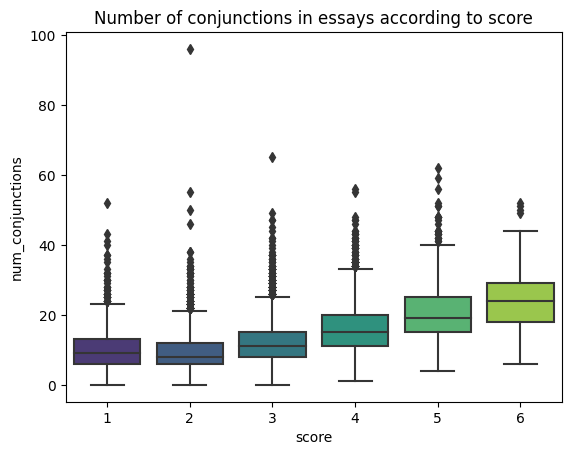

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


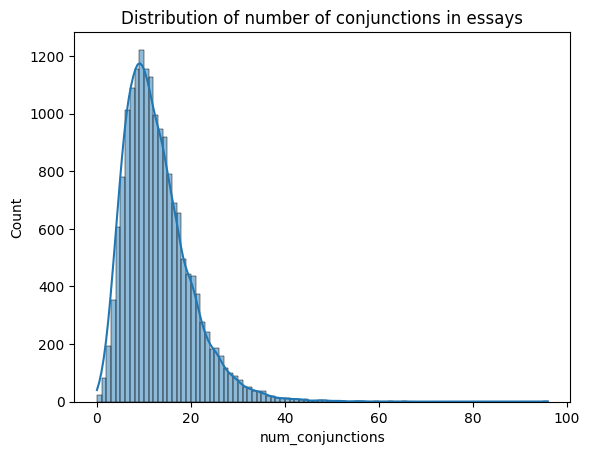

In [ ]:
show_box_plot(train_df, 'score', 'num_conjunctions',
              'Number of conjunctions in essays according to score')

show_hist_plot(train_df, 'num_conjunctions',
               'Distribution of number of conjunctions in essays', binwidth=1)

## Number of distinct words

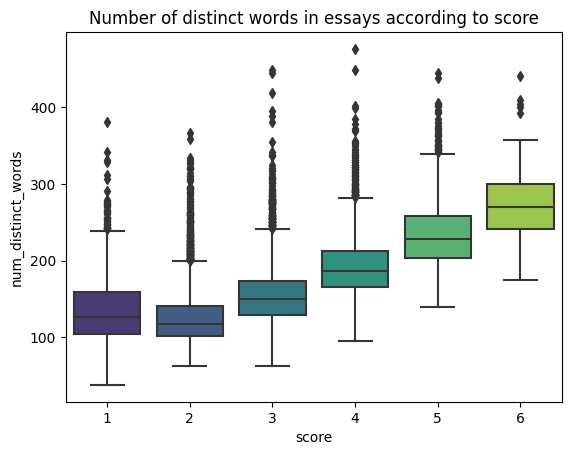

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


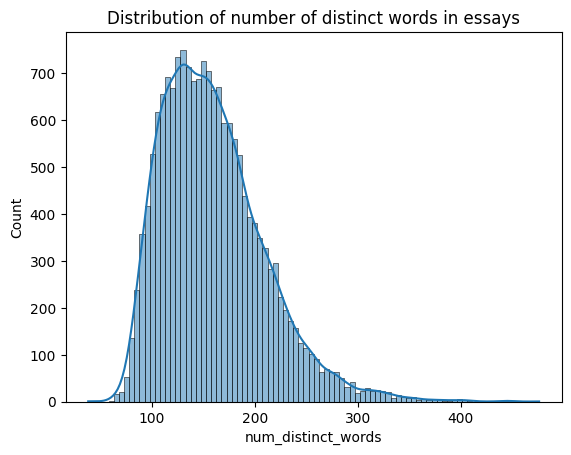

In [ ]:
show_box_plot(train_df, 'score', 'num_distinct_words',
              'Number of distinct words in essays according to score')

show_hist_plot(train_df, 'num_distinct_words',
               'Distribution of number of distinct words in essays')

## Number of misspelled words

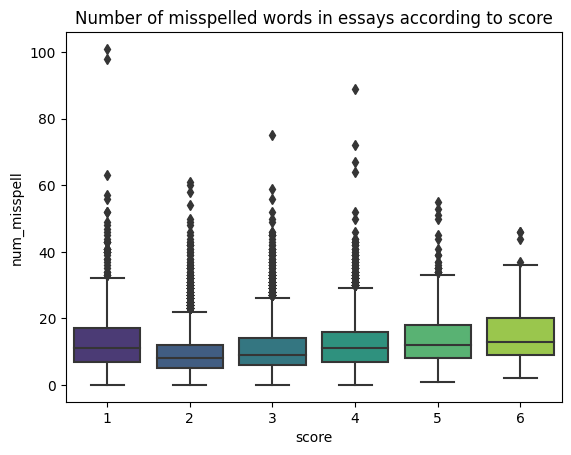

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


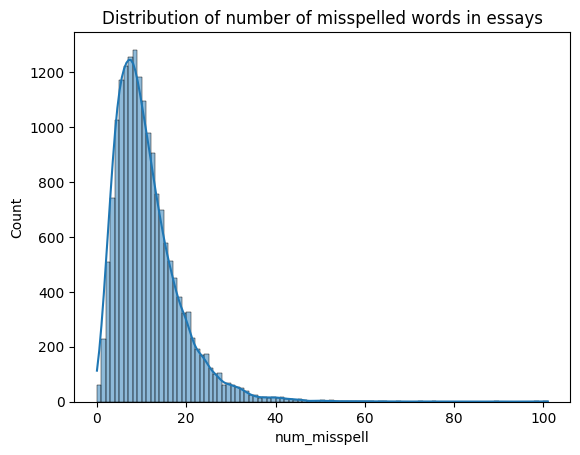

In [ ]:
show_box_plot(train_df, 'score', 'num_misspell',
              'Number of misspelled words in essays according to score')

show_hist_plot(train_df, 'num_misspell',
               'Distribution of number of misspelled words in essays', binwidth=1)

## Mean of word length

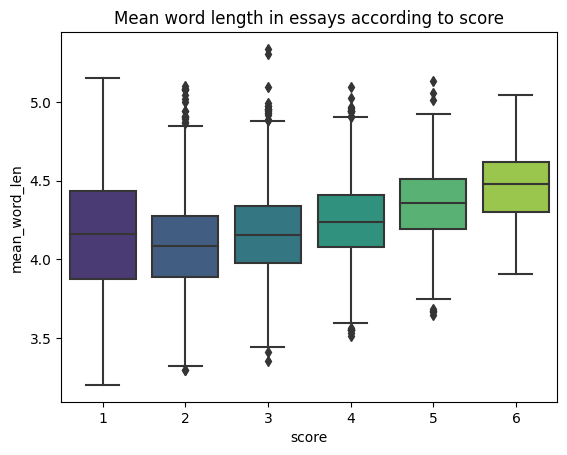

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


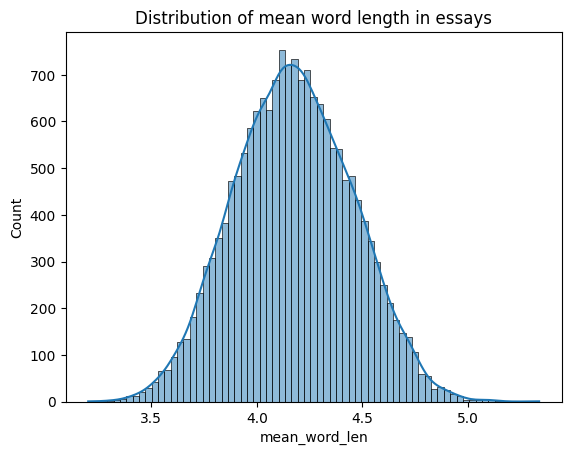

In [ ]:
show_box_plot(train_df, 'score', 'mean_word_len',
              'Mean word length in essays according to score')

show_hist_plot(train_df, 'mean_word_len',
               'Distribution of mean word length in essays')

# Sentence-scale analysis

## Number of sentences

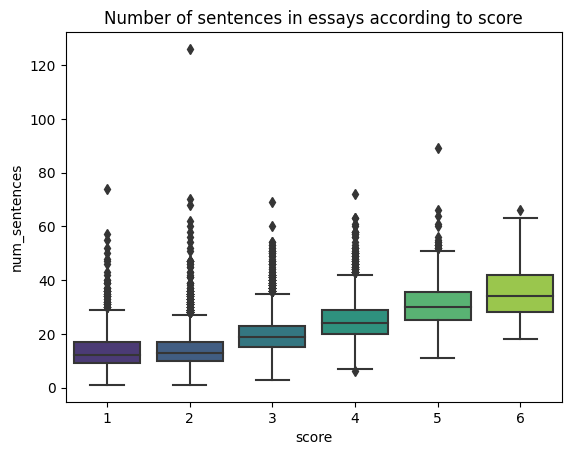

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


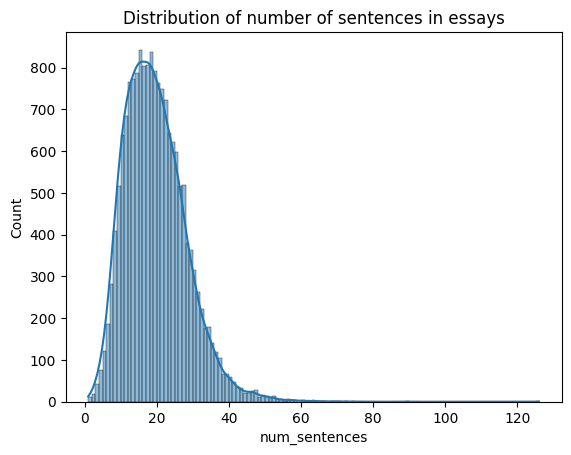

In [ ]:
show_box_plot(train_df, 'score', 'num_sentences',
              'Number of sentences in essays according to score')

show_hist_plot(train_df, 'num_sentences',
               'Distribution of number of sentences in essays', binwidth=1)

## The average sentence length

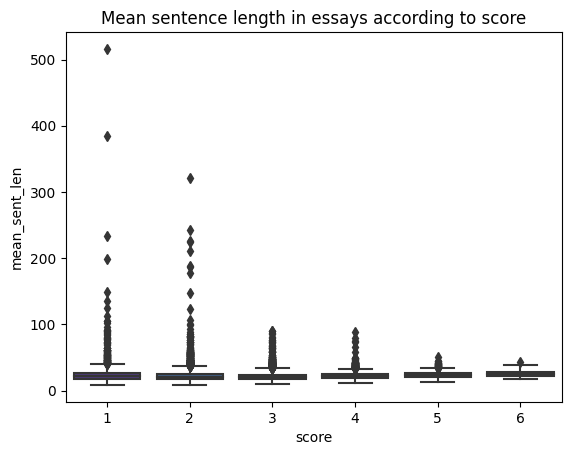

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


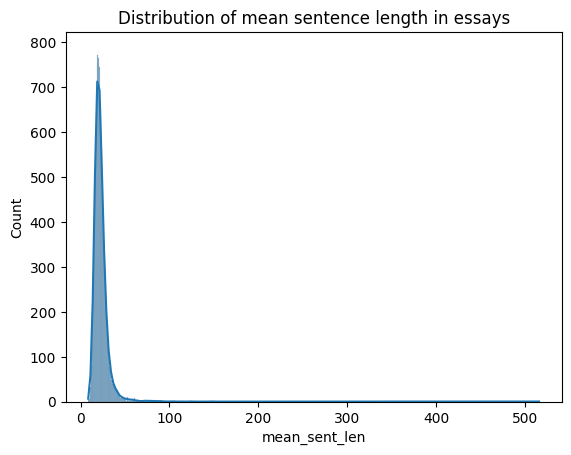

In [ ]:
show_box_plot(train_df, 'score', 'mean_sent_len',
              'Mean sentence length in essays according to score')

show_hist_plot(train_df, 'mean_sent_len',
               'Distribution of mean sentence length in essays')

In [ ]:
train_df['mean_sent_len'].describe()

count    17307.000000
mean        22.584457
std         10.295441
min          8.560000
25%         18.000000
50%         21.000000
75%         24.888889
max        516.000000
Name: mean_sent_len, dtype: float64

In [ ]:
train_df[train_df['mean_sent_len'] == train_df['mean_sent_len'].max()]['full_text'].values[0]

'if i had to choose i would change to election vote cause it is more popular and it has less problems unlike the other cause when you do electoral college you have to do lots ofdifferent things that is not worth doing which is a disaster for some people and while other people are saying how good the electoral college is if its so good why do you so many issues with things that happen to people thats what i dont understand they dont let some people vote cause there age which is stupid they should let them vote thats the reason why ther areso many disputes in the world cause of the ignorance of some people and the only thing the people from electoral college is worried about iswinning instead of carring for the other people which is not right that is the reason so many outbreaks happen cause people start to not even give a crap about the people that is wanting to vote but the people is not worriedtwo cents about what anyone else thinks their just worried bout themselves which is stupid a

## Correlation between linguitics features and scores

In [ ]:
import ast

train_df['paragraphs'] = train_df['paragraphs'].apply(ast.literal_eval)

In [ ]:
train_df['paragraphs'].sample(1).values[0]

['Luke Bomberger became a Seagoing Cowboy he helps people whose lives had been affected by World War ll. Luke became a Seagoing',
 'Cowboy because he knew it was an opportunity of a lifetime, as he says in paragraph one. Luke also wanted to help others who had been affected by World War ll.',
 'Luke crossed the Atlantic Ocean sixteen times and the Pacific Ocean twice, to help countries recover their food supplies, animals, and much more as it says in paragraph two. Even though it was a long journey across the oceans and the waters were rough Luke loved being a Seagoing Cowboy and he loved to help the people.',
 'Some people would probably refuse to go to another country that had just been through war some people would say it was to risky and unsafe well it is, some people might say that it is too dangerous to cross the ocean well it is but Luke felt that these were things that he needed to do and is something that is important to him.',
 'Luke also got to visit many great places in bet

In [ ]:
train_raw_df = pd.read_csv('../../data/train.csv')

In [ ]:
print(train_raw_df[train_raw_df['essay_id'] == '0033bf4']['full_text'].values[0])

What is the Seagoing Cowboys progam?

It was to help many countries that had been scarred by World War II.

These people helped with cattle and other animals that were shipped to Europe to help them.

People were asked to help by the United Nations Relief and Rehabilitation Administration, or UNRRA.

People should join the Seagoing Cowboys progam because, you get to help other countries and people, you get to see many parts of the world, and you have fun.

If you are in the Seagoing Cowboys progam, you can help other countries by giving them animals for food and work.

It makes you feel good about yourself.

The article says, " It made me more aware other countries and their needs."

That would make someone feel good about themselves for helping other countries.

Wouldn't that make you feel good?

In the Seagoing Cowboys program, you can see many parts of the world depending on where you are going.

You could see Italy and other countries.

The article states, "Besides helping people, 

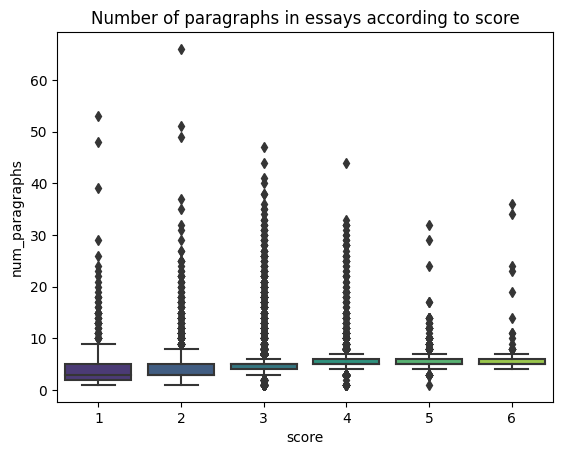

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


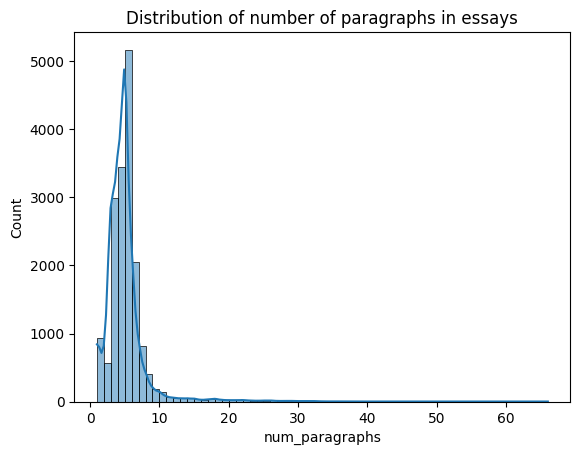

In [ ]:
show_box_plot(train_df, 'score', 'num_paragraphs',
                'Number of paragraphs in essays according to score')

show_hist_plot(train_df, 'num_paragraphs',
                'Distribution of number of paragraphs in essays', binwidth=1)


In [ ]:
corr_matrix = train_df.corr(numeric_only=True)

corr_matrix

,score,num_paragraphs,num_sentences,num_words,num_conjunctions,num_distinct_words,num_misspell,mean_word_len,mean_sent_len
score,1.000000,0.187261,0.582802,0.694353,0.457399,0.602863,0.094648,0.233292,-0.043477
num_paragraphs,0.187261,1.000000,0.338873,0.303048,0.172672,0.278194,0.154680,0.056313,-0.093410
num_sentences,0.582802,0.338873,1.000000,0.821596,0.530384,0.731111,0.290553,0.051553,-0.338601
num_words,0.694353,0.303048,0.821596,1.000000,0.736518,0.906685,0.387080,0.163927,0.029302
num_conjunctions,0.457399,0.172672,0.530384,0.736518,1.000000,0.674034,0.298855,-0.000156,0.134527
num_distinct_words,0.602863,0.278194,0.731111,0.906685,0.674034,1.000000,0.513099,0.275741,0.039223
num_misspell,0.094648,0.154680,0.290553,0.387080,0.298855,0.513099,1.000000,0.109873,0.070756
mean_word_len,0.233292,0.056313,0.051553,0.163927,-0.000156,0.275741,0.109873,1.000000,0.047213
mean_sent_len,-0.043477,-0.093410,-0.338601,0.029302,0.134527,0.039223,0.070756,0.047213,1.000000


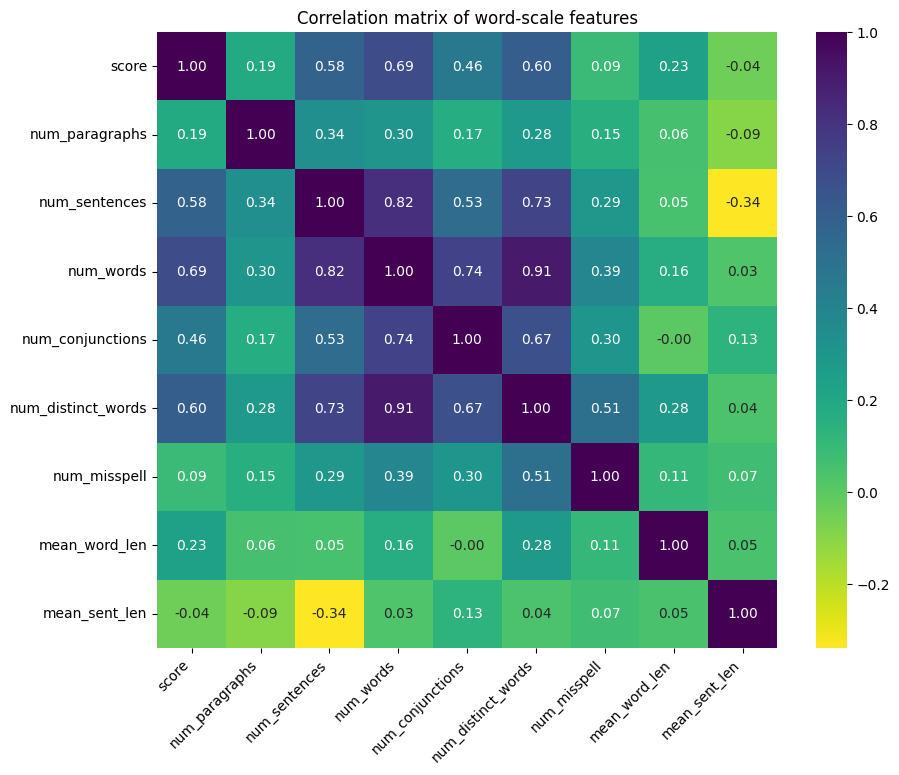

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis_r', cbar=True)

plt.xticks(rotation=45, ha='right')

plt.title("Correlation matrix of word-scale features")
# Show the plot
plt.show()

In [ ]:
# filter out pairs with correlation > 0.85
high_corr = corr_matrix[abs(corr_matrix) > 0.8].stack().reset_index()

high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]

# drop duplicates
high_corr = high_corr.drop_duplicates(subset=0)

high_corr = high_corr.rename(columns={0: 'correlation'})

high_corr = high_corr.sort_values(by='correlation', ascending=False).reset_index(drop=True)

high_corr

,level_0,level_1,correlation
0,num_words,num_distinct_words,0.906685
1,num_sentences,num_words,0.821596


The high_corr features are highly correlated feature (correlation > 0.85), which means they are almost linearly correlated. So we'll keep only the most correlated feature with the scores: num_words, discard the others.